In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from rdp import rdp
import simplekml
warnings.filterwarnings('ignore')

from geopy.distance import great_circle

## reading trajectories

In [7]:
# for mk#16
left_lane = pd.read_csv('/Users/admin/Desktop/Fall 2022/PATH GSR/data/trajectory/left_lane_gyro.csv')
right_lane = pd.read_csv('/Users/admin/Desktop/Fall 2022/PATH GSR/data/trajectory/right_lane_gyro.csv')

In [54]:
left_lane = pd.read_csv('/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/left_lane_gyro.csv')
right_lane = pd.read_csv('/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/right_lane_gyro.csv')

left_lane_11_4 = pd.read_csv('/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/Highway Loop Left Lane 11-4-2022.csv')
right_lane_11_4 = pd.read_csv('/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/Highway Loop Right Lane 11-4-2022.csv')

left_lane_11_4_250hz = pd.read_csv('/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/Highway Loop Left Lane 11-4-2022 (250Hz).csv')
right_lane_11_4_250hz = pd.read_csv('/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/Highway Loop Right Lane 11-4-2022 (250Hz).csv')

In [56]:
left_lane.shape

(42656, 36)

In [57]:
left_lane_11_4_250hz.shape

(70817, 24)

In [58]:
# seconds
0.004 * left_lane_11_4_250hz.shape[0], 

283.26800000000003

In [43]:
# unit: hz
left_freq = 1 / np.average(left_lane['Time Delta (s)'])
right_freq = 1 / np.average(right_lane['Time Delta (s)'])
left_freq, right_freq

(99.9976557188738, 100.0)

In [45]:
# unit: hz
left_freq * (left_lane_11_4.shape[0] / left_lane.shape[0]), right_freq * (right_lane_11_4.shape[0] / right_lane.shape[0])

(8.29875518672199, 9.802294708894367)

In [55]:
# unit: hz
left_freq * (left_lane_11_4_250hz.shape[0] / left_lane.shape[0]), right_freq * (right_lane_11_4_250hz.shape[0] / right_lane.shape[0])

(166.01495651358508, 196.07197041532334)

In [12]:
3718 / left_lane.shape[0] # m/data point, avg

0.08716241560390098

In [47]:
left_lane.head()

,Time from start of file (s),Time from initialisation (s),Time Delta (s),Time from start of region (s),Time (GPS s),Seconds from midnight Sunday (),Latitude (deg),Latitude,Longitude (deg),Longitude,...,Angular rate down (deg/s),Angular rate Xv (deg/s),Angular rate Yv (deg/s),Angular rate Zv (deg/s),Acceleration forward (m/s²),Acceleration lateral (m/s²),Acceleration down (m/s²),Acceleration Xv (m/s²),Acceleration Yv (m/s²),Acceleration Zv (m/s²)
0,0.52,0.02,0.02,0.06,1339876238,244237.52,42.238616,422386159.4,-83.557666,-835576657.0,...,NaN,0.048128,-0.247518,-0.444615,NaN,NaN,NaN,0.5258,0.0424,-9.5669
1,0.53,0.03,0.01,0.07,1339876238,244237.53,42.238616,422386159.4,-83.557666,-835576656.5,...,NaN,-0.105424,-0.183919,-0.483576,NaN,NaN,NaN,0.5205,-0.0383,-9.6920
2,0.54,0.04,0.01,0.08,1339876238,244237.54,42.238616,422386159.5,-83.557666,-835576655.9,...,NaN,0.000000,0.045837,-0.647442,NaN,NaN,NaN,0.6938,0.0022,-9.5327
3,0.55,0.05,0.01,0.09,1339876238,244237.55,42.238616,422386159.6,-83.557666,-835576655.4,...,NaN,-0.105997,-0.033805,-0.378152,NaN,NaN,NaN,0.5996,0.1073,-9.3675
4,0.56,0.06,0.01,0.10,1339876238,244237.56,42.238616,422386159.6,-83.557665,-835576654.9,...,NaN,0.268144,0.320856,-0.776931,NaN,NaN,NaN,0.5240,0.0666,-9.5688


In [6]:
left_lane.columns

Index(['Time from start of file (s)', 'Time from initialisation (s)',
       'Time from start of region (s)', 'Time (GPS s)',
       'Seconds from midnight Sunday ()', 'Latitude (deg)', 'Latitude',
       'Longitude (deg)', 'Longitude', 'Altitude (m)',
       'Distance horizontal (m)', 'Velocity forward (m/s)',
       'Velocity lateral (m/s)', 'Velocity down (m/s)',
       'Speed horizontal (m/s)', 'Number of GPS satellites used ()',
       'GPS position mode ()', 'GPS velocity mode ()',
       'GPS dual antenna attitude mode ()', 'Heading (deg)', 'Pitch (deg)',
       'Roll (deg)', 'Slip angle (deg)', 'Angular rate forward (deg/s)',
       'Angular rate lateral (deg/s)', 'Angular rate down (deg/s)',
       'Angular rate Xv (deg/s)', 'Angular rate Yv (deg/s)',
       'Angular rate Zv (deg/s)', 'Acceleration forward (m/s²)',
       'Acceleration lateral (m/s²)', 'Acceleration down (m/s²)',
       'Acceleration Xv (m/s²)', 'Acceleration Yv (m/s²)',
       'Acceleration Zv (m/s²)'],
     

In [51]:
coln_to_keep  = [
    'Latitude (deg)', 'Longitude (deg)', 'Altitude (m)', # GPS
    'Velocity lateral (m/s)', # IMU measurements
    'Heading (deg)', 'Pitch (deg)', 'Roll (deg)', 'Slip angle (deg)',
]

In [53]:
left_lane_raw = left_lane[coln_to_keep]
right_lane_raw = right_lane[coln_to_keep]
left_lane_raw.head()

,Latitude (deg),Longitude (deg),Altitude (m),Velocity lateral (m/s),Heading (deg),Pitch (deg),Roll (deg),Slip angle (deg)
0,42.238616,-83.557666,221.040299,NaN,82.240299,0.116654,-0.056608,NaN
1,42.238616,-83.557666,221.040253,NaN,82.235085,0.115050,-0.057009,NaN
2,42.238616,-83.557666,221.040207,NaN,82.228668,0.115566,-0.057067,NaN
3,42.238616,-83.557666,221.040176,NaN,82.224887,0.115222,-0.058098,NaN
4,42.238616,-83.557665,221.040039,NaN,82.216751,0.118660,-0.054889,NaN


In [13]:
left_lane_filtered = left_lane[~left_lane.isna()]

## calculate total length of the test track

In [30]:
def track_lane_distance(df):
    
    length_mi = 0

    for index, row in tqdm(df.iterrows()):
        try:
            start = (row['Latitude (deg)'], row['Longitude (deg)'])
            end = (df.iloc[index+1]['Latitude (deg)'], df.iloc[index+1]['Longitude (deg)'])
            length_mi += great_circle(start, end).meters
        except:
            end = (df.iloc[0]['Latitude (deg)'], df.iloc[0]['Longitude (deg)'])
            length_mi += great_circle(start, end).meters
    
    return length_mi

In [36]:
# runtime = 20s

left_lane_length = track_lane_distance(left_lane)
right_lane_length = track_lane_distance(right_lane)

42656it [00:14, 2894.51it/s]
42184it [00:14, 2928.71it/s]


In [35]:
left_lane_length_11_4 = track_lane_distance(left_lane_11_4)
right_lane_length_11_4 = track_lane_distance(right_lane_11_4)

3540it [00:00, 4726.72it/s]
4135it [00:00, 4771.13it/s]


In [32]:
# unit: meters
left_lane_length, right_lane_length

(3718.8997850769492, 3714.9650133625605)

In [37]:
# unit: meters
left_lane_length_11_4, right_lane_length_11_4

(3707.217927455698, 3825.6727662637304)

In [39]:
# m/data points

left_lane_length / left_lane.shape[0], left_lane_length_11_4 / left_lane_11_4.shape[0]

(0.08718350959013853, 1.0472367026711011)

In [11]:
left_lane_rdp_mask = rdp(left_lane[['Latitude', 'Longitude']].to_numpy(), epsilon=5, return_mask=True)
right_lane_rdp_mask = rdp(right_lane[['Latitude', 'Longitude']].to_numpy(), epsilon=5, return_mask=True)

In [29]:
right_lane.tail()

,Time from start of file (s),Time from initialisation (s),Time from start of region (s),Time (GPS s),Seconds from midnight Sunday (),Latitude (deg),Latitude,Longitude (deg),Longitude,Altitude (m),...,Angular rate down (deg/s),Angular rate Xv (deg/s),Angular rate Yv (deg/s),Angular rate Zv (deg/s),Acceleration forward (m/s²),Acceleration lateral (m/s²),Acceleration down (m/s²),Acceleration Xv (m/s²),Acceleration Yv (m/s²),Acceleration Zv (m/s²)
42179,422.03,421.73,421.82,1339876214,244214.03,42.238600,422386004.9,-83.557570,-835575702.7,221.011200,...,-0.280491,0.240069,-0.246945,-0.274447,-2.373736,-0.096095,-9.335056,-2.4142,-0.3681,-9.3179
42180,422.04,421.74,421.83,1339876214,244214.04,42.238601,422386005.3,-83.557570,-835575697.6,221.011215,...,0.104611,-0.116310,-0.755158,0.127197,-2.273400,-0.089104,-9.946971,-2.3178,-0.3787,-9.9299
42181,422.05,421.75,421.84,1339876214,244214.05,42.238601,422386005.7,-83.557569,-835575692.6,221.011231,...,-0.262329,-0.429718,-0.151261,-0.256112,-2.276382,0.114236,-9.940100,-2.3210,-0.1745,-9.9289
42182,422.06,421.76,421.85,1339876214,244214.06,42.238601,422386006.1,-83.557569,-835575687.5,221.011139,...,0.215958,-0.469825,-0.359245,0.228610,-2.478139,-0.102263,-9.417401,-2.5210,-0.3749,-9.3991
42183,422.07,421.77,421.86,1339876214,244214.07,42.238601,422386006.6,-83.557568,-835575682.5,221.011063,...,0.190161,-0.407946,-0.626816,0.210276,-2.484140,0.100812,-9.242125,-2.5272,-0.1661,-9.2295


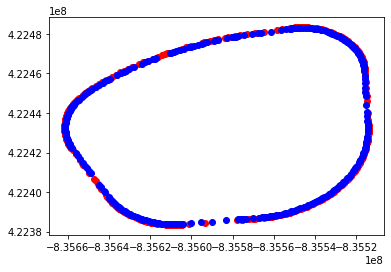

In [18]:
right_lane_rdp = right_lane[right_lane_rdp_mask]
left_lane_rdp = left_lane[left_lane_rdp_mask]
# plt.figure(figsize=(10, 10))
plt.scatter(right_lane_rdp.Longitude, right_lane_rdp.Latitude, c='red')
plt.scatter(left_lane_rdp.Longitude, left_lane_rdp.Latitude, c='blue')
# plt.colorbar(sc)

In [23]:
right_lane_rdp.head()

,Time from start of file (s),Time from initialisation (s),Time from start of region (s),Time (GPS s),Seconds from midnight Sunday (),Latitude (deg),Latitude,Longitude (deg),Longitude,Altitude (m),...,Angular rate down (deg/s),Angular rate Xv (deg/s),Angular rate Yv (deg/s),Angular rate Zv (deg/s),Acceleration forward (m/s²),Acceleration lateral (m/s²),Acceleration down (m/s²),Acceleration Xv (m/s²),Acceleration Yv (m/s²),Acceleration Zv (m/s²)
0,0.24,-0.06,0.03,1339875792,243792.24,42.238598,422385982.4,-83.557556,-835575556.5,220.969849,...,NaN,0.258977,-0.162720,0.247518,NaN,NaN,NaN,0.0860,-0.3854,-9.7577
866,8.90,8.60,8.69,1339875801,243800.90,42.238629,422386290.5,-83.557214,-835572140.2,220.833649,...,NaN,0.584990,-0.700727,0.433156,NaN,NaN,NaN,1.2725,0.1024,-9.6740
1058,10.82,10.52,10.61,1339875803,243802.82,42.238647,422386471.4,-83.556992,-835569922.5,220.819656,...,NaN,-0.568374,0.323721,-2.223649,NaN,NaN,NaN,-0.3071,-0.7643,-9.7021
1132,11.56,11.26,11.35,1339875804,243803.56,42.238655,422386552.0,-83.556908,-835569076.6,220.832077,...,NaN,0.031513,-0.196525,-2.038011,NaN,NaN,NaN,-0.2306,-0.3684,-10.2569
1280,13.04,12.74,12.83,1339875805,243805.04,42.238673,422386734.2,-83.556744,-835567436.7,220.887558,...,NaN,-0.643432,0.456074,-0.304241,NaN,NaN,NaN,0.0294,-0.2264,-10.6572


In [25]:
right_lane_rdp.tail()

,Time from start of file (s),Time from initialisation (s),Time from start of region (s),Time (GPS s),Seconds from midnight Sunday (),Latitude (deg),Latitude,Longitude (deg),Longitude,Altitude (m),...,Angular rate down (deg/s),Angular rate Xv (deg/s),Angular rate Yv (deg/s),Angular rate Zv (deg/s),Acceleration forward (m/s²),Acceleration lateral (m/s²),Acceleration down (m/s²),Acceleration Xv (m/s²),Acceleration Yv (m/s²),Acceleration Zv (m/s²)
39417,394.41,394.11,394.20,1339876186,244186.41,42.238355,422383547.2,-83.560476,-835604761.3,222.318680,...,-1.053927,0.311689,-0.393049,-1.062837,-0.327369,-0.141508,-8.818225,-0.3081,0.0670,-8.8198
39773,397.97,397.67,397.76,1339876190,244189.97,42.238384,422383844.5,-83.560093,-835600925.7,222.143372,...,-0.372625,0.512797,0.375287,-0.377579,0.002253,0.020766,-9.774519,-0.0011,-0.1029,-9.7740
40481,405.05,404.75,404.84,1339876197,244197.05,42.238448,422384484.5,-83.559334,-835593336.4,221.838287,...,0.054952,-0.090527,0.332316,0.047555,-0.033258,-0.191240,-9.715878,-0.0113,-0.4018,-9.7095
41916,419.40,419.10,419.19,1339876211,244211.40,42.238582,422385817.9,-83.557794,-835577938.4,221.092056,...,-0.062883,0.517381,0.523683,-0.076203,-0.049275,-0.011923,-9.631032,-0.0481,-0.2576,-9.6276
42183,422.07,421.77,421.86,1339876214,244214.07,42.238601,422386006.6,-83.557568,-835575682.5,221.011063,...,0.190161,-0.407946,-0.626816,0.210276,-2.484140,0.100812,-9.242125,-2.5272,-0.1661,-9.2295


In [24]:
kml = simplekml.Kml()
right_lane_rdp.apply(lambda row: kml.newpoint(coords=[(row["Longitude (deg)"], row["Latitude (deg)"])]), axis=1)
kml.save(path = "/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2022/PATH GSR/data/trajectory/right_lane_rdp.kml")

In [8]:
left_lane['Velocity forward (m/s)']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
42651   -0.012040
42652   -0.011357
42653   -0.010182
42654   -0.009872
42655   -0.009607
Name: Velocity forward (m/s), Length: 42656, dtype: float64

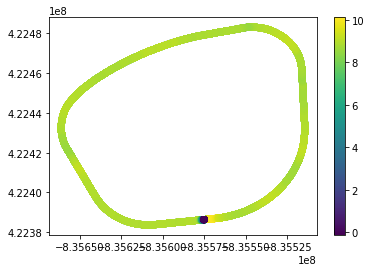

In [30]:
# plt.figure(figsize=(10, 10))
sc = plt.scatter(left_lane.Longitude, left_lane.Latitude, c=left_lane['Velocity forward (m/s)'])
plt.colorbar(sc)

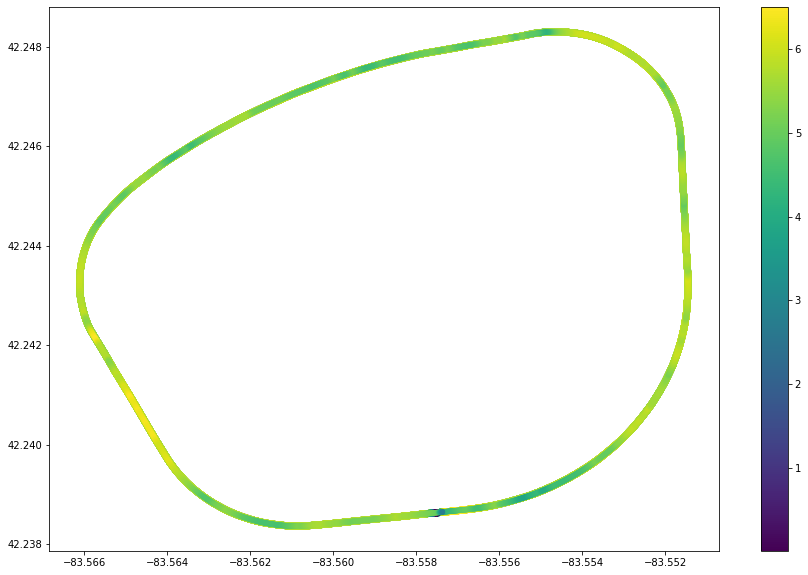

In [29]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(left_lane['Longitude (deg)'], left_lane['Latitude (deg)'], c=left_lane['Velocity forward (m/s)'])
sc = plt.scatter(left_lane_11_4['Longitude (deg)'], left_lane_11_4['Latitude (deg)'], c=left_lane_11_4['Velocity forward (m/s)'], s=20)

plt.colorbar(sc)

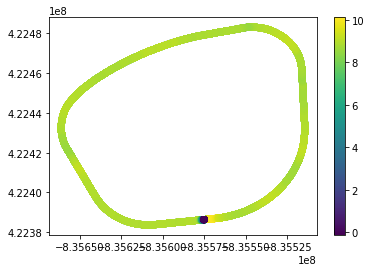

In [22]:
# plt.figure(figsize=(10, 10))
sc = plt.scatter(left_lane[~left_lane.isna().any(axis=1)].Longitude, left_lane[~left_lane.isna().any(axis=1)].Latitude, c=left_lane[~left_lane.isna().any(axis=1)]['Velocity forward (m/s)'])
plt.colorbar(sc)

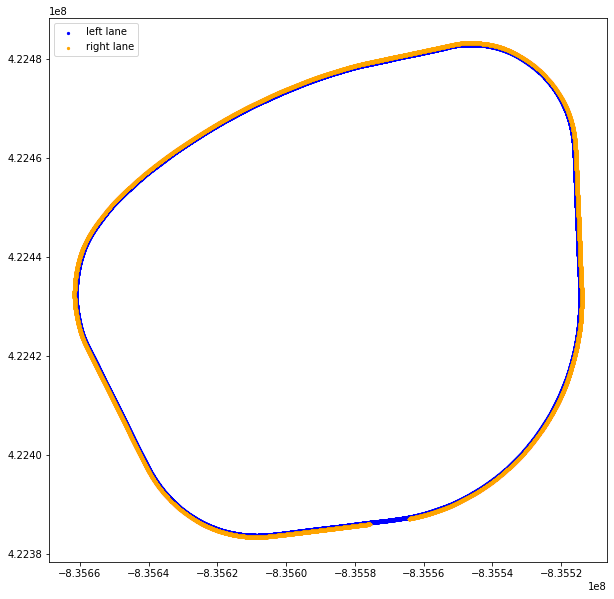

In [11]:
plt.figure(figsize=(10, 10))# , dpi=100)
plt.scatter(left_lane[~left_lane.isna().any(axis=1)].Longitude, left_lane[~left_lane.isna().any(axis=1)].Latitude, c='blue', s=5, label='left lane')
plt.scatter(right_lane[~right_lane.isna().any(axis=1)].Longitude, right_lane[~right_lane.isna().any(axis=1)].Latitude, c='orange', s=5, label='right lane')
plt.legend()


In [20]:
right_lane_11_4[right_lane_11_4.isna().any(axis=1)]

,Latitude (deg),Longitude (deg),Altitude (m),Distance horizontal (m),Velocity forward (m/s),Velocity lateral (m/s),Velocity down (m/s),Speed horizontal (m/s),Heading (deg),Pitch (deg),...,Angular rate down (deg/s),Angular rate Xv (deg/s),Angular rate Yv (deg/s),Angular rate Zv (deg/s),Acceleration forward (m/s²),Acceleration lateral (m/s²),Acceleration down (m/s²),Acceleration Xv (m/s²),Acceleration Yv (m/s²),Acceleration Zv (m/s²)


In [19]:
left_lane[left_lane.isna().any(axis=1)]

,Time from start of file (s),Time from initialisation (s),Time Delta (s),Time from start of region (s),Time (GPS s),Seconds from midnight Sunday (),Latitude (deg),Latitude,Longitude (deg),Longitude,...,Angular rate down (deg/s),Angular rate Xv (deg/s),Angular rate Yv (deg/s),Angular rate Zv (deg/s),Acceleration forward (m/s²),Acceleration lateral (m/s²),Acceleration down (m/s²),Acceleration Xv (m/s²),Acceleration Yv (m/s²),Acceleration Zv (m/s²)
0,0.52,0.02,0.02,0.06,1339876238,244237.52,42.238616,422386159.4,-83.557666,-835576657.0,...,NaN,0.048128,-0.247518,-0.444615,NaN,NaN,NaN,0.5258,0.0424,-9.5669
1,0.53,0.03,0.01,0.07,1339876238,244237.53,42.238616,422386159.4,-83.557666,-835576656.5,...,NaN,-0.105424,-0.183919,-0.483576,NaN,NaN,NaN,0.5205,-0.0383,-9.6920
2,0.54,0.04,0.01,0.08,1339876238,244237.54,42.238616,422386159.5,-83.557666,-835576655.9,...,NaN,0.000000,0.045837,-0.647442,NaN,NaN,NaN,0.6938,0.0022,-9.5327
3,0.55,0.05,0.01,0.09,1339876238,244237.55,42.238616,422386159.6,-83.557666,-835576655.4,...,NaN,-0.105997,-0.033805,-0.378152,NaN,NaN,NaN,0.5996,0.1073,-9.3675
4,0.56,0.06,0.01,0.10,1339876238,244237.56,42.238616,422386159.6,-83.557665,-835576654.9,...,NaN,0.268144,0.320856,-0.776931,NaN,NaN,NaN,0.5240,0.0666,-9.5688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,3.96,3.46,0.01,3.50,1339876241,244240.96,42.238624,422386242.0,-83.557615,-835576155.0,...,NaN,0.040680,-0.104278,5.158912,NaN,NaN,NaN,0.0037,0.0146,-9.7095
345,3.97,3.47,0.01,3.51,1339876241,244240.97,42.238624,422386242.4,-83.557615,-835576153.0,...,NaN,-0.032659,0.075630,4.990462,NaN,NaN,NaN,-0.0599,0.1694,-9.6337
346,3.98,3.48,0.01,3.52,1339876241,244240.98,42.238624,422386242.7,-83.557615,-835576151.0,...,NaN,-0.085944,0.132353,5.347415,NaN,NaN,NaN,-0.1391,0.1442,-9.8418
347,3.99,3.49,0.01,3.53,1339876241,244240.99,42.238624,422386243.1,-83.557615,-835576149.0,...,NaN,0.100268,0.393049,5.390387,NaN,NaN,NaN,-0.0925,0.0704,-10.0132


In [41]:
left_lane.iloc[0][6]

42.23861594